In [2]:
import numpy as np

### The normal distribution

Recall the definition for the normal distribution

$\mathcal{N}(\alpha;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac {(\alpha - \mu)^{2}} {2\sigma^{2}}\right]$

In python we can write this as

gaussian normalizes to 0.9999999999999294
numerical mean is 4.9999999999996465, analytic mean is 5
numerical sd is 2.0057309991925987, analytic sigma is 2


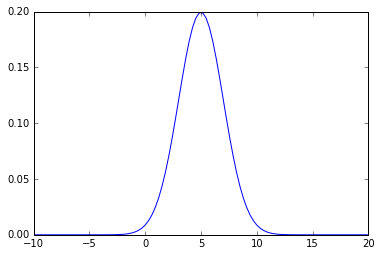

In [3]:
%matplotlib inline
def normal(alpha,mu,sigma):
    out=(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(alpha - mu)**2./(2*sigma**2.))
    return out
    
alpha = np.linspace(-10,20,100)
#
# analytic mean and standard deviation
#
mu=5
sigma = 2
out=normal(alpha,mu,sigma)
out_centers = (out[1:] + out[:-1])/2.
alpha_centers = (alpha[1:] + alpha[:-1])/2.
fig,ax = plt.subplots(1,1)
ax.plot(alpha,out)
#
# numerical area -- should be 1 for pdf
#
area = np.sum(out_centers*np.diff(alpha))
print('gaussian normalizes to {}'.format(area))
#
# numerical mean should be 5
#
mean = np.sum(alpha_centers*out_centers*np.diff(alpha))
print('numerical mean is {}, analytic mean is {}'.format(mean,mu))
#
# numerical sd should be 2
#
var = np.sum((alpha_centers - mean)**2.*out_centers*np.diff(alpha))
print("numerical sd is {}, analytic sigma is {}".format(np.sqrt(var),sigma))
                   

### The lognormal distribution

For a **lognormal** distribution, the variable that is normally distributed is $\alpha = \ln x$.  This distribution arises because processes that create the end value (like the mass of areosols) are *multiplicative* instead of *additive*.  That is, while a normal variable is generated by the sum of many random variables (the central limit theorem) a *lognomal variable* is generated by the product of many random variables

$\mathcal{N}(\ln(x);\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left[-\frac {(\ln(x) - \mu)^{2}} {2\sigma^{2}}\right], \ \ x>0.$

Note that it's a little more complicated than just swapping $\alpha = \ln x$. Recall that a change of variables has to conserve area, i.e.:

$\mathcal{N}(\alpha, \mu, \sigma) d\alpha= \mathcal{N}(\ln x, \mu, \sigma) d\alpha  = f(x)dx$

and since:

$d\alpha = d \alpha = \frac{dx}{x}$ this means:

$\mathcal{N}(\ln x, \mu, \sigma) d\alpha  = f(x)\; d\alpha \; x$  so that:

$f(x) = \frac{1}{x} N(\ln x, \mu, \sigma) = \frac{1}{x \sigma\sqrt{2\pi}} \exp\left[-\frac {(\ln(x) - \mu)^{2}} {2\sigma^{2}}\right]$

In python:

lognormal normalizes to 1.0000003181775388
numerical mean is 1.609439140420588, analytic mean is 1.6094379124341003
numerical sd is 0.6931476351064921, analytic sigma is 0.6931471805599453


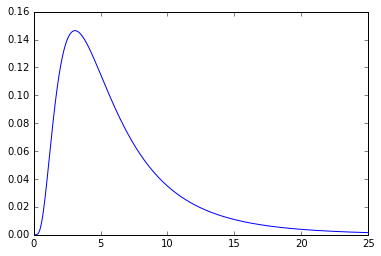

In [4]:
def lognormal(x,mu,sigma):
    """
    parameters
    ----------
    x: vector (float)  
      aerosol masses (kg)  (for example)
      
    mu: float
       log(mean mass)
       
    sigma: float
       log(standard deviation)
       
    returns
    -------
    
    out: vector (float)
        lognormal pdf, normalized to 1
        units
    
    """
    out=(1/(x*sigma*np.sqrt(2*np.pi)))*np.exp(-(np.log(x) - mu)**2./(2*sigma**2.))
    return out

x = np.linspace(-3,3,10000)
x = 10**x
mu=5
sigma = 2
out = lognormal(x,np.log(mu),np.log(sigma))
fig,ax = plt.subplots(1,1)
ax.plot(x,out)
ax.set(xlim=[0,25])
out_centers = (out[1:] + out[:-1])/2.
x_centers = (x[1:] + x[:-1])/2. 

#
# total probability should be 1
#
area = np.sum(out_centers*np.diff(x))
print('lognormal normalizes to {}'.format(area))
#
# mean should be log(5)
#
mean = np.sum(np.log(x_centers)*out_centers*np.diff(x))
print('numerical mean is {}, analytic mean is {}'.format(mean,np.log(mu)))
#
# sd should be log(2)
#
var = np.sum((np.log(x_centers) - mean)**2.*out_centers*np.diff(x))
print("numerical sd is {}, analytic sigma is {}".format(np.sqrt(var),np.log(sigma)))

### lognormal aerosol mass distribution

It's an observational fact that aerosol masses tend to follow a lognormal distribuiton.

As a specific example take:

1\. Mean aerosol mass $\mu = 2 \times 10^{-17}$ kg

2\. Log of the standard deviation = $\ln 1.7$

3\. Total mass of aerosols = $10^{-9}\; kg\;m^{-3}$ = 1 $\mu g\;m^{-3}$

4\. Aerosol density 1775 $kg\,m^{-3}$

So what is the radius of a mean aerosol?  We want to find:

$4/3 \pi r^3 \times \rho_{aer}$ = $2 \times 10^{-17}$ kg

In [5]:
rho_aer = 1775 #kg/m^3
rad_cubed = 2.e-17/(4./3.*np.pi*rho_aer)
volume_mean_rad = rad_cubed**(1./3.)
print('volume mean radius is {} microns'.format(volume_mean_rad*1.e6))

volume mean radius is 0.13907455414506933 microns


Plot the mass distribution as a function of aerosol dry radius.

1\. First get the mass distribution as a function of mass



In [6]:
mass_vals = np.linspace(-19,-15,100)
mass_vals = 10**mass_vals
tot_mass = 1.e-9 #kg/m^3
mu= np.log(2.e-17)
sd = np.log(1.7)
out = tot_mass*lognormal(mass_vals,mu,sd)

2\. Note the units:  out has units of $kg\;m^{-3}\;kg^{-1}$ and 
mass_vals has units of $kg$.  For plotting, it would be
better to have the x-axis in picograms (pg) where 
$1 pg = 1 kg \times 10^{15}\;pg\;kg^{-1}$

In addition the units for the y axis become:

$kg\;m^{-3}\;kg^{-1}\;10^{-15}\;kg\;pg^{-1}$

In the same way, we can convert the aerosol mass concentration from
$kg\;m^{-1}$ to micrograms: $kg \times 10^{9} \mu g\;kg^{-1}$

That makes the y axis units:


$kg\;m^{-3}\;kg^{-1}$ = 1 $kg \times 10^{9} \mu g\;kg^{-1}\;kg^{-1}\;10^{-15}\;kg\;pg^{-1}$
= $10^{-6}\ \mu g\;m^{-3}\;pg^{-1}$

So when we plot, we want to multiply the xaxis by $10^{15}$ and the yaxis by $10^{-6}$


area in micrograms/m^3 = 1.0014431705752074


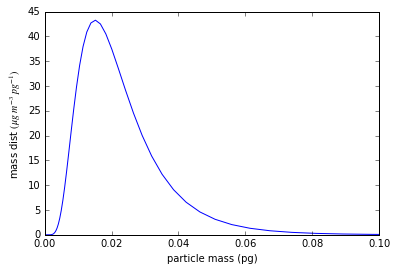

In [7]:
plt.close('all')
fig,ax = plt.subplots(1,1)
ax.plot(mass_vals*1.e15,out*1.e-6)
ax.set_xlim([0,0.1])
labels=ax.set(xlabel="particle mass (pg)",ylabel="mass dist $(\mu g\;m^{-3}\;pg^{-1})$")
out_centers = (out[1:] + out[:-1])/2.
area = np.sum(out_centers*np.diff(mass_vals)*1.e15*1.e-6)
print("area in micrograms/m^3 = {}".format(area))

### Number distribution n(r)  ($\# \,m^{-3}\;m^{-1}$)

If we know the density of the spherical aerosols and the aerosol mass in a bin,
then we can figure out the number of aerosols/$m^3$ in the bin.

Call the mass distribution $mass_{dist}$ with units of $(\mu g\;m^{-3}\;pg^{-1})$.  Then
the aerosol concentration for aerosols with masses in the range $m \rightarrow m+dm$ is

$m_{bin}(m) = mass_{dist}(m) dm$  units: $kg\;m^{-3}$

In the same way the numbers of aerosols in the bin is 

$n_{bin}$ = $n(r) dr$  units: $\#\;m^{-3}$

but the aerosols are spherical, so in each bin with center mass $m$ and center
radius $r$:

$m_{bin} = 4/3 \pi r^3 \rho_{aer} n_{bin}$

$mass_{dist} dm = 4/3 \pi r^3 \rho_{aer} n(r) dr$

$dm = d (4/3 \pi r^3 \rho_{aer}) = 4 \pi r^2 \rho_{aer} dr$

So combining these gives:

$n(r) = \frac{3}{r} mass_{dist}(m)$

**Units**

We're still in mks, so $n(r)$ has units of $\#\;m^{-3}\;m^{-1}$.  
Make this:

1 $\#\;m^{-3}\;m^{-1}$ = 1 $\#m^{-3} \times 10^{-6}\;m^{3}\;cm^{-3} \times 10^{-6} m\;\mu m^{-1}$ = $1 \times 10^{-12}\ \#\;cm^{-3}\; \mu m^{-1}$

So again, when we plot we multiply the xaxis by $10^6$ and the yaxis by $10^{-12}$


total number concentration is 57.57 #/cc


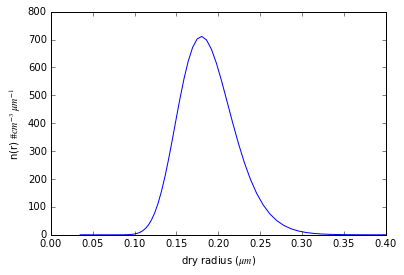

In [8]:
rad_vals = (mass_vals/(rho_aer*4./3.))**(1./3.)
ndist = 3.*out/rad_vals  #units of number/m^3 per m bin width
fig,ax = plt.subplots(1,1)
ncenter = (ndist[1:] + ndist[:-1])/2.
#
# convert radii to microns and ndist to #/cc/um
#
ax.plot(rad_vals*1.e6,ndist*1.e-12)
ax.set(xlim=[0,0.4],xlabel="dry radius ($\mu m$)",
      ylabel = r'n(r) $\# cm^{-3}\;\mu m^{-1}$')
total_num=np.sum(ncenter*np.diff(rad_vals)*1.e-6)
print("total number concentration is {:5.2f} #/cc".format(total_num))

### problem for Wednesday

Add a cell to this notebook that makes a plot of $N(r)$ vs. $S_{crit}$ for the $n(r)$ in the previous cell,  where:

$N(r) = \int_r^\infty n(r) dr$ is the number of aerosols with dry radii larger than $r$ and $S_{crit}$ is the critical supersaturation at radius r for these ammonium sulphate aerosols.  Explain briefly why this is the output you would expect to see from an aerosol size counter based on a cloud chamber with a laser scattering sensor.

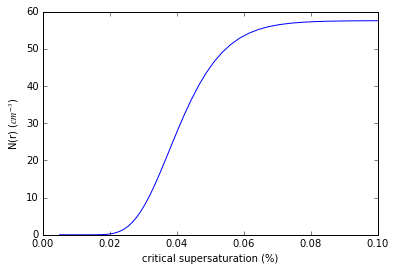

In [17]:
SScrit = 1.54e-12*mass_vals**(-0.5)
SScenter = (SScrit[1:] + SScrit[:-1])/2.
N_tot = np.sum(ncenter*np.diff(rad_vals))
N_r = N_tot - np.cumsum(ncenter*np.diff(rad_vals))
fig,ax = plt.subplots(1,1)
ax.plot(SScenter*100,N_r*1.e-6)
ax.set(xlabel="critical supersaturation (%)",
       ylabel = 'N(r) ($cm^{-3}$)')
out=ax.set(xlim=[0,0.1])
